In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import keras 

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

<b> Preprocessing of Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<u>Note:</u>
<ul><li>for X: there are 60000 images, each of dimensions 28 X 28 </li>
<li>Similarly for X_test: 10000 images each of 28 X 28 dimensions</li>
    <li>For y_train (that's the output, hence only no. of images): 60000 images</li>
    <li>For y_test: 10000 images</li></ul>

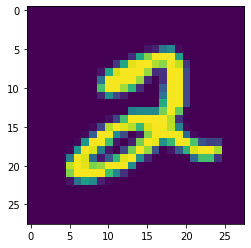

In [3]:
plt.imshow(X_train[5])

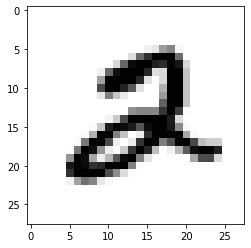

In [4]:
plt.imshow(X_train[5], cmap = 'binary')

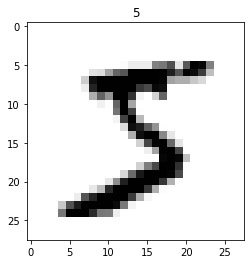

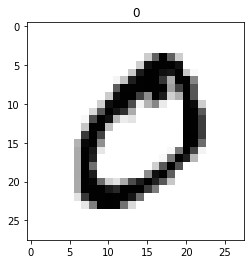

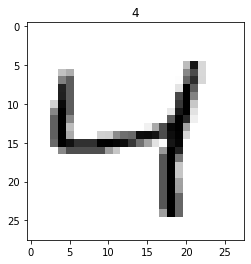

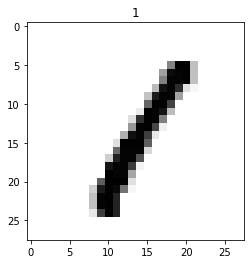

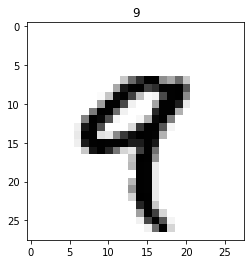

In [5]:
def plot_input(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

for i in range(5):
    plot_input(i)

In [6]:
#Pre-processing of Data

#Image Normalizations
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255
X_train.shape

(60000, 28, 28)

In [7]:
#Reshape/ expand the dimensions of the images to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#Convert classes/output to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dropout(rate = 0.25))

model.add(Dense(units = 10, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [12]:
model.compile(optimizer= "adam", loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [13]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience = 4, verbose = 1)

#ModelCheckpoint
modelCp = ModelCheckpoint("./HandwrittenDigitRecognition.h5", monitor= "val_accuracy", verbose= 1, save_best_only= True)

cb = [es, modelCp]
model.save('HandwrittenDigitRecognition.h5')


<b> Model Training

In [14]:
history = model.fit(X_train, y_train, epochs = 10, validation_split= 0.3, callbacks = cb )

Epoch 1/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9336
Epoch 1: val_accuracy improved from -inf to 0.97628, saving model to .\HandwrittenDigitRecognition.h5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2186 - accuracy: 0.9337 - val_loss: 0.0771 - val_accuracy: 0.9763
Epoch 2/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9779
Epoch 2: val_accuracy improved from 0.97628 to 0.98006, saving model to .\HandwrittenDigitRecognition.h5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0722 - accuracy: 0.9780 - val_loss: 0.0635 - val_accuracy: 0.9801
Epoch 3/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9831
Epoch 3: val_accuracy improved from 0.98006 to 0.98539, saving model to .\HandwrittenDigitRecognition.h5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0478 - val_accura

In [15]:
model_save = keras.models.load_model("C:/Users/Shabdansh/OneDrive/Desktop/DigitRecognition/HandwrittenDigitRecognition.h5")

In [16]:
score = model_save.evaluate(X_test, y_test)
print(f"The model loss is {score[0]} ")
print(f"The model accuracy is {score[1]} ")

313/313 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9890
The model loss is 0.03395233303308487 
The model accuracy is 0.9890000224113464 
